### Integrantes

- Juan José Naranjo Velasquez 
- Diego Alejandro Mora Suarez
- Kenneth David Leonel Triana

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import rand_score
from scipy.stats import multivariate_normal
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

d:\programasProgramacion\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:

fifa = pd.read_csv("data/FIFA23_official_data.csv")
fifa.head(5)


ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    Manchester City   
4  https://cdn.sofifa.net/flags/it.png       86         89              Inter   

                                 Club Logo  ... Real Face  \
0   https://cdn.sofifa.net/teams/21/30.png  ...       Yes   
1   https://cdn.sofifa.net/teams/11/30.png  ...       Yes   
2  https://cdn.sofifa.net/teams/481/30.png  ...        No   
3   https://cdn.sofifa.net/teams/10/30.png  ...       Yes   
4   https://cdn.sofifa.net/teams/44/30.png  ...       Yes   

                      Position        Joined Loaned From  \
0  <span class="pos pos28">SUB   Jul 1, 2018         NaN   
1  <span class="pos pos15">LCM  Jan 30, 2020         NaN   
2    <span class="pos pos7">LB  Sep 14, 2020         NaN   
3  <span class="pos pos13">RCM  Aug 30, 2015         NaN   
4  <span class="pos pos13">RCM   Sep 1, 2020         NaN   

   Contract Valid Until  Height  Weight Release Clause Kit Number  \
0                  2026   189cm    82kg          €157M        8.0   
1                  2026   179cm    69kg          €155M        8.0   
2                  2024   172cm    69kg         €97.7M       19.0   
3                  2025   181cm    70kg        €198.9M       17.0   
4                  2026   172cm    68kg        €154.4M       23.0   

  Best Overall Rating  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

#Exploracion del DataSEt


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [5]:
# Se verifican la cantida de valores nulos y en que columnas se encuentran
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

#Limpieza de Datos

Inicialmente se identifican columnas que no tienen informacion relevante para el objetivo del clustering el cual es evaluar el performace de cada jugador,tales como logo del club, club,foto, entre otras. Tambien se logra visualizar columnas con una gran cantidad de nulos.

In [6]:
#Eliminamos columnas que no tienen relacion hacia las caracteristicas, habilidad o desterzas de cada jugador
columnas=(['Photo','Flag','Club Logo','Real Face','Best Overall Rating','Loaned From','Joined',
           'Contract Valid Until','ID','Name','Nationality','Club','Kit Number','Position',
           'Work Rate','Body Type','Release Clause'])
fifa_limpio=fifa.drop(columns=columnas)
fifa_limpio


Age  Overall  Potential    Value   Wage  Special Preferred Foot  \
0       27       87         88     €91M  €115K     2312          Right   
1       27       86         87   €78.5M  €190K     2305          Right   
2       30       85         85   €46.5M   €46K     2303           Left   
3       31       91         91  €107.5M  €350K     2303          Right   
4       25       86         89   €89.5M  €110K     2296          Right   
...    ...      ...        ...      ...    ...      ...            ...   
17655   19       48         61    €100K   €500      762          Right   
17656   17       48         64    €100K   €500      761          Right   
17657   25       51         56     €70K    €2K      759          Right   
17658   18       50         65     €90K   €500      758          Right   
17659   20       50         61     €90K   €500      749           Left   

       International Reputation  Weak Foot  Skill Moves Height Weight  
0                           4.0        4.0          3.0  189cm   82kg  
1                           3.0        3.0          4.0  179cm   69kg  
2                           2.0        3.0          3.0  172cm   69kg  
3                           4.0        5.0          4.0  181cm   70kg  
4                           3.0        3.0          3.0  172cm   68kg  
...                         ...        ...          ...    ...    ...  
17655                       1.0        3.0          1.0  190cm   78kg  
17656                       1.0        2.0          1.0  195cm   84kg  
17657                       1.0        2.0          1.0  190cm   82kg  
17658                       1.0        2.0          1.0  187cm   79kg  
17659                       1.0        2.0          1.0  186cm   78kg  

[17660 rows x 12 columns]

In [7]:
#Reemplazamos la piera agil izquierda por 0 y derecha por 1
fifa_limpio["Preferred Foot"] = fifa_limpio["Preferred Foot"].replace({"Left": 0, "Right": 1})


C:\Users\USER\AppData\Local\Temp\ipykernel_18452\139772620.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fifa_limpio["Preferred Foot"] = fifa_limpio["Preferred Foot"].replace({"Left": 0, "Right": 1})


In [8]:
# Convertir a numericas columnas peso y talla
fifa_limpio['Weight'] = fifa_limpio['Weight'].str.replace('kg', '').astype(float)
fifa_limpio['Height'] = fifa_limpio['Height'].str.replace('cm', '').astype(float)
fifa_limpio

Age  Overall  Potential    Value   Wage  Special  Preferred Foot  \
0       27       87         88     €91M  €115K     2312               1   
1       27       86         87   €78.5M  €190K     2305               1   
2       30       85         85   €46.5M   €46K     2303               0   
3       31       91         91  €107.5M  €350K     2303               1   
4       25       86         89   €89.5M  €110K     2296               1   
...    ...      ...        ...      ...    ...      ...             ...   
17655   19       48         61    €100K   €500      762               1   
17656   17       48         64    €100K   €500      761               1   
17657   25       51         56     €70K    €2K      759               1   
17658   18       50         65     €90K   €500      758               1   
17659   20       50         61     €90K   €500      749               0   

       International Reputation  Weak Foot  Skill Moves  Height  Weight  
0                           4.0        4.0          3.0   189.0    82.0  
1                           3.0        3.0          4.0   179.0    69.0  
2                           2.0        3.0          3.0   172.0    69.0  
3                           4.0        5.0          4.0   181.0    70.0  
4                           3.0        3.0          3.0   172.0    68.0  
...                         ...        ...          ...     ...     ...  
17655                       1.0        3.0          1.0   190.0    78.0  
17656                       1.0        2.0          1.0   195.0    84.0  
17657                       1.0        2.0          1.0   190.0    82.0  
17658                       1.0        2.0          1.0   187.0    79.0  
17659                       1.0        2.0          1.0   186.0    78.0  

[17660 rows x 12 columns]

In [9]:
#Limpiamos las columnas Value y Wage que contiene simbolos de moneda se convierten todos  a una escala de miles

def limpiar_valores(valor):
  """
  Convierte datos en moneda a texto a escalas de miles

  IN: valor: str
  OUT: float
  """
  if isinstance(valor, str):
      valor = valor.replace("€", "")
      if valor.endswith("K"):
          return float(valor[:-1]) * 1000
      elif valor.endswith("M"):
          return float(valor[:-1]) * 1000000
      else:
          return float(valor) * 1000
  return valor




fifa_limpio["Value"] = fifa_limpio["Value"].apply(limpiar_valores)
fifa_limpio["Wage"] = fifa_limpio["Wage"].apply(limpiar_valores)

fifa_limpio

Age  Overall  Potential        Value      Wage  Special  \
0       27       87         88   91000000.0  115000.0     2312   
1       27       86         87   78500000.0  190000.0     2305   
2       30       85         85   46500000.0   46000.0     2303   
3       31       91         91  107500000.0  350000.0     2303   
4       25       86         89   89500000.0  110000.0     2296   
...    ...      ...        ...          ...       ...      ...   
17655   19       48         61     100000.0  500000.0      762   
17656   17       48         64     100000.0  500000.0      761   
17657   25       51         56      70000.0    2000.0      759   
17658   18       50         65      90000.0  500000.0      758   
17659   20       50         61      90000.0  500000.0      749   

       Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0                   1                       4.0        4.0          3.0   
1                   1                       3.0        3.0          4.0   
2                   0                       2.0        3.0          3.0   
3                   1                       4.0        5.0          4.0   
4                   1                       3.0        3.0          3.0   
...               ...                       ...        ...          ...   
17655               1                       1.0        3.0          1.0   
17656               1                       1.0        2.0          1.0   
17657               1                       1.0        2.0          1.0   
17658               1                       1.0        2.0          1.0   
17659               0                       1.0        2.0          1.0   

       Height  Weight  
0       189.0    82.0  
1       179.0    69.0  
2       172.0    69.0  
3       181.0    70.0  
4       172.0    68.0  
...       ...     ...  
17655   190.0    78.0  
17656   195.0    84.0  
17657   190.0    82.0  
17658   187.0    79.0  
17659   186.0    78.0  

[17660 rows x 12 columns]

#Escalada de Datos

In [10]:
scaler = MinMaxScaler()
fifa_limpio[fifa_limpio.columns] = scaler.fit_transform(fifa_limpio[fifa_limpio.columns])
fifa_limpio.head()

Age   Overall  Potential     Value      Wage   Special  \
0  0.307692  0.916667   0.867925  0.477690  0.121053  1.000000   
1  0.307692  0.895833   0.849057  0.412073  0.200000  0.995521   
2  0.384615  0.875000   0.811321  0.244094  0.048421  0.994242   
3  0.410256  1.000000   0.924528  0.564304  0.368421  0.994242   
4  0.256410  0.895833   0.886792  0.469816  0.115789  0.989763   

   Preferred Foot  International Reputation  Weak Foot  Skill Moves    Height  \
0             1.0                      0.75       0.75         0.50  0.701754   
1             1.0                      0.50       0.50         0.75  0.526316   
2             0.0                      0.25       0.50         0.50  0.403509   
3             1.0                      0.75       1.00         0.75  0.561404   
4             1.0                      0.50       0.50         0.50  0.403509   

     Weight  
0  0.548387  
1  0.338710  
2  0.338710  
3  0.354839  
4  0.322581

#GMM

d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

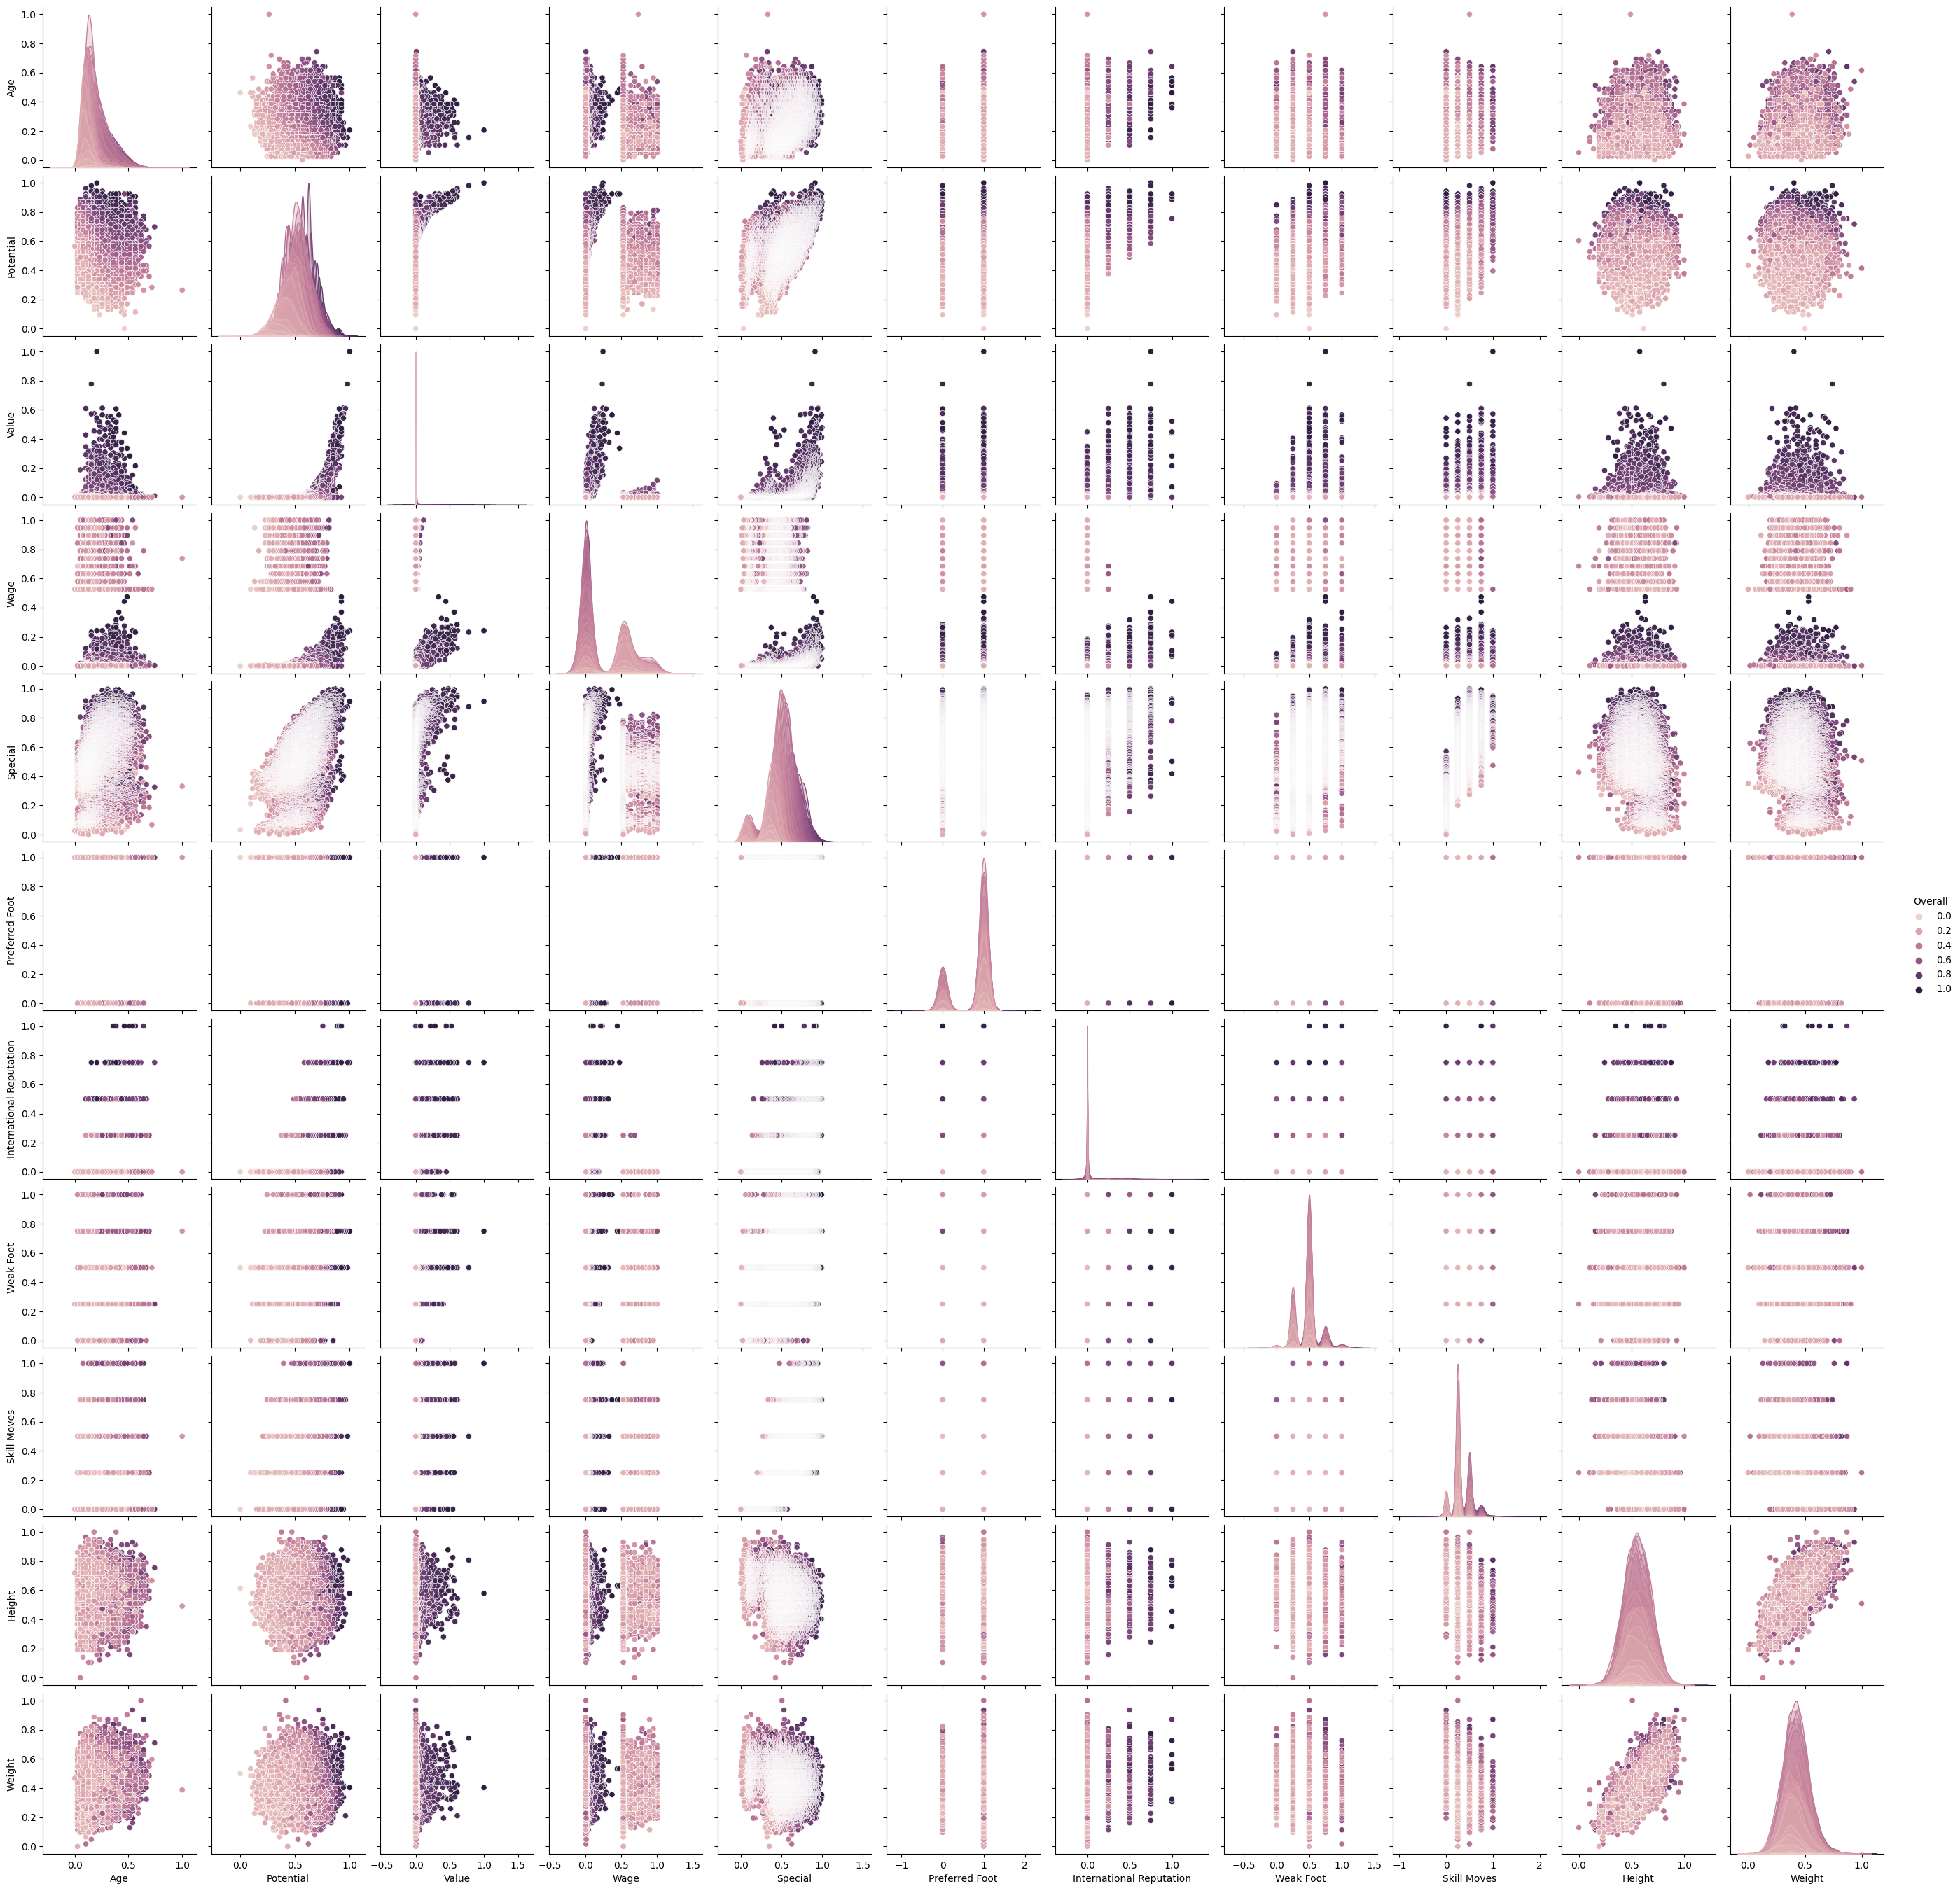

In [11]:
sns.pairplot(fifa_limpio, hue='Overall')

Analizando las gráficas, observamos que los datos no presentan una dispersión clara en ninguna de sus características. Por esta razón, comenzamos el análisis utilizando Overall y Edad, pero los resultados no fueron favorables para aplicar el modelo GMM. Luego, probamos con Special y Overall, obteniendo un resultado similar.

Finalmente, tras evaluar diversas combinaciones, optamos por utilizar Overall y Value, ya que es razonable suponer que a mayor evaluación de un jugador, mayor podría ser su valor en el mercado.


In [12]:
#Seleccionamos para la prueba el feacture 2 que es el que meustra mejor dispersion
X_2d = fifa_limpio.iloc[:, [1,3]]
X_2d

Overall     Value
0      0.916667  0.477690
1      0.895833  0.412073
2      0.875000  0.244094
3      1.000000  0.564304
4      0.895833  0.469816
...         ...       ...
17655  0.104167  0.000525
17656  0.104167  0.000525
17657  0.166667  0.000367
17658  0.145833  0.000472
17659  0.145833  0.000472

[17660 rows x 2 columns]

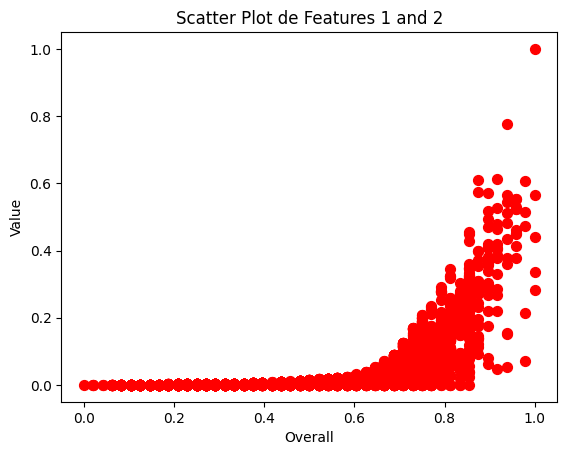

In [13]:
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Scatter Plot de Features 1 and 2')
plt.show()

La gráfica sugiere que solo algunos jugadores con alta evaluación tienen un valor significativamente mayor, aunque hay una tendencia creciente no todos los judadores con mayor Overall tienen un valor alto lo que nos lleva a entender que hay otras factores que influyen en el valor del jugador, como la edad, la nacionalidad entre otras.


In [14]:
# Inicializar aleatoriamente los theta_old
# Fija el número de clusters K = 3
np.random.seed(42)
pi1 = 0.25
pi2 = 0.45
pi3 = 0.3
mu_1 = np.random.randn(2,) + np.reshape([0.1,0.1],(2,))
mu_2 = np.random.randn(2,) + np.reshape([0.4,0.9],(2,))
mu_3 = np.random.randn(2,) + np.reshape([0.6,0.4],(2,))

In [15]:
aux = np.random.randn(2,2)
print(aux)
print(aux.T)
print(aux.T@aux)

[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[ 1.57921282 -0.46947439]
 [ 0.76743473  0.54256004]]
[[2.71431932 0.95722472]
 [0.95722472 0.88332746]]


In [16]:
aux = np.random.randn(2,2)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))

[[ 0.13665085 -0.12355711]
 [-0.12355711  1.93877275]] 0.24966858280658477
[[2.0005842  0.32581015]
 [0.32581015 0.20745933]] 0.3088875935403325
[[1.48631702 0.4757485 ]
 [0.4757485  1.02278834]] 1.2938510792552076


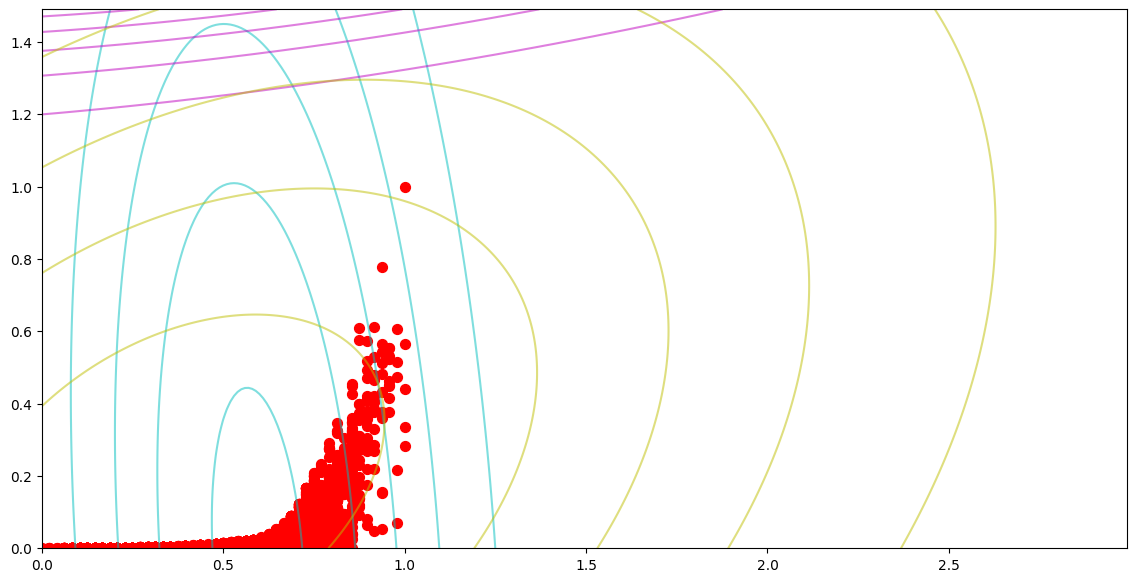

In [17]:
# Graficamos el ajuste inicial
# Se crea la matriz de datos
x, y = np.mgrid[0:3:.01, 0:1.5:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(14, 7))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)

En esta gráfica podemos visulizar el sesgo que tienen los datos a la derecha, y esto es porque los datos estan concentados la mayor parte de una region muy pequeña lo que puede afectar mas adelante a la identificacion de multiples grupos

In [18]:
gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X_2d.shape[0]):
  x_n = X_2d.iloc[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[5.50050609e-01 9.57465396e-06 4.49939816e-01]
 [5.66747231e-01 4.12539624e-06 4.33248644e-01]
 [5.91516957e-01 4.25317994e-07 4.08482617e-01]
 ...
 [4.87336880e-01 6.53554351e-08 5.12663055e-01]
 [4.70203089e-01 7.06119466e-08 5.29796841e-01]
 [4.70203089e-01 7.06119466e-08 5.29796841e-01]]


In [19]:
len(X_2d)

17660

In [20]:
X_2d.columns

Index(['Overall', 'Value'], dtype='object')

In [21]:
# Construirmos el modelo discriminante
N1, N2, N3 = 5886,5886,5886
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N

X_d2 = X_2d

X_C1 = X_d2.iloc[:5886, :]
X_C2 = X_d2.iloc[5886:11772, :]
X_C3 = X_d2.iloc[11772:, :]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.repeat(muC1.values.reshape(1, -1), N1, axis=0)
M2 = np.repeat(muC2.values.reshape(1, -1), N2, axis=0)
M3 = np.repeat(muC3.values.reshape(1, -1), N3, axis=0)

S1 = np.cov(X_C1, rowvar=False, bias=True)
S2 = np.cov(X_C2, rowvar=False, bias=True)
S3 = np.cov(X_C3, rowvar=False, bias=True)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

In [22]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_d2.T) + w_10
A2 = w_C2.T.dot(X_d2.T) + w_20
A3 = w_C3.T.dot(X_d2.T) + w_30

A = np.vstack((A1,A2,A3)).T

In [23]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
postCk

array([[0.97682275, 0.00612004, 0.01705721],
       [0.98263611, 0.00721453, 0.01014936],
       [0.99181884, 0.00692825, 0.00125291],
       ...,
       [0.00191524, 0.16795223, 0.83013253],
       [0.00121394, 0.14260679, 0.85617927],
       [0.00121394, 0.14260679, 0.85617927]])

In [24]:
Sigma

array([[0.01383604, 0.00229374],
       [0.00229374, 0.00149745]])

C:\Users\USER\AppData\Local\Temp\ipykernel_18452\669569057.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
C:\Users\USER\AppData\Local\Temp\ipykernel_18452\669569057.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
C:\Users\USER\AppData\Local\Temp\ipykernel_18452\669569057.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior).

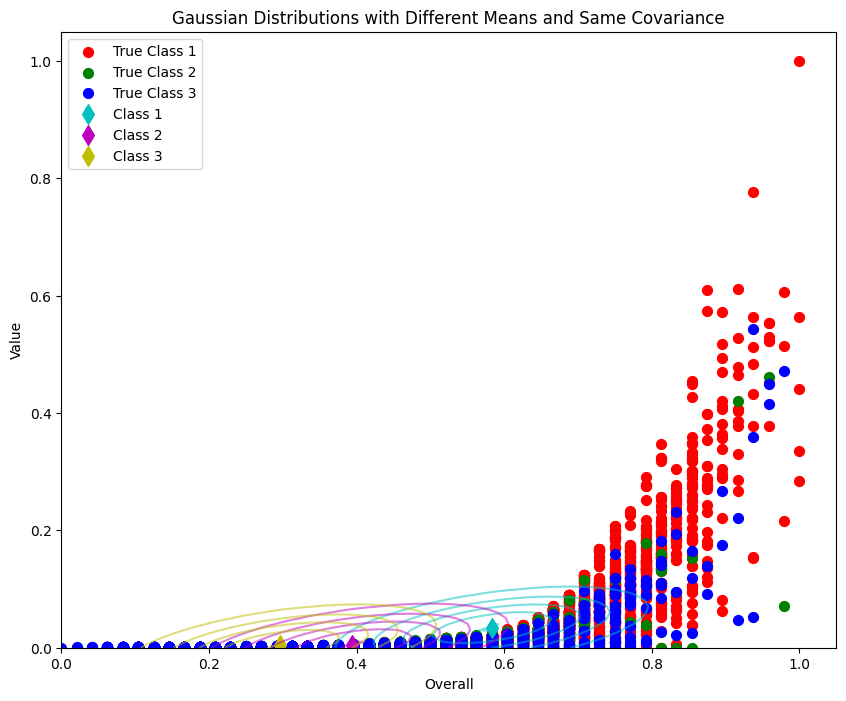

In [25]:
# Create a grid of points
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1.iloc[:,0], X_C1.iloc[:,1], marker='o', color='r', s=50, label='True Class 1')
plt.scatter(X_C2.iloc[:,0], X_C2.iloc[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3.iloc[:,0], X_C3.iloc[:,1], marker='o', color='b', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='y', s=100, label='Class 3')

plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Gaussian Distributions with Different Means and Same Covariance')
plt.legend()
plt.show()

Se siguen visualizando una baja dispersion de los datos ostrando un alta concentracion en 1 para el Value y Overall

In [26]:
if np.any(np.isnan(X_2d)) or np.any(np.isinf(X_2d)):
    print("Warning: X_2d contiene datos nulos o infinitos ")

este es las cáracteriísticas evaluadas        Potential    Height
0       0.867925  0.701754
1       0.849057  0.526316
2       0.811321  0.403509
3       0.924528  0.561404
4       0.886792  0.403509
...          ...       ...
17655   0.358491  0.719298
17656   0.415094  0.807018
17657   0.264151  0.719298
17658   0.433962  0.666667
17659   0.358491  0.649123

[17660 rows x 2 columns]


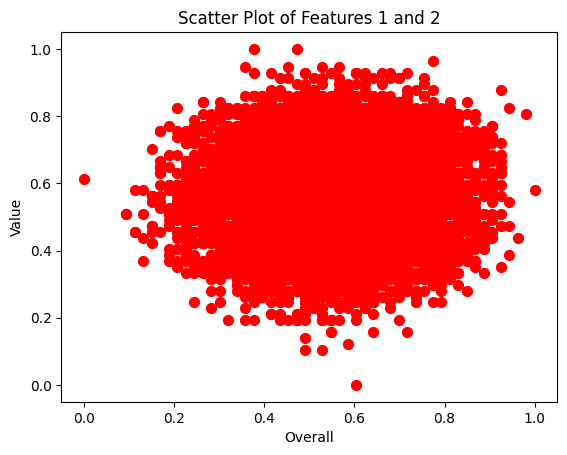

In [27]:
# Initialize parameters

X = fifa_limpio.drop('Overall', axis=1)
y = fifa_limpio['Value']
X_2d = X.iloc[:,[1,9]]
print(f'este es las cáracteriísticas evaluadas {X_2d}')
X_2d = X_2d.to_numpy()

# Scatter plot of first two features
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', color='r', s=50)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

No se percibe una relación lineal entre Overall y Value, lo que confirma que estos datos no son adecuados para una segmentación en grupos o clústeres. La dispersión uniforme y la ausencia de patrones claros indican que no hay una separación evidente entre posibles categorías

#Modelo de Mezclas Gaussianas

In [28]:
K = 3  # Number of clusters
n, d = X_2d.shape
epsilon = 1e-6  # Small value to prevent log(0)
# Mixing coefficients (initial uniform distribution)
pi = np.ones(K) / K
# Initialize means using random samples from data
random_indices = np.random.choice(n, K, replace=False)
mu = X_2d[random_indices, :]


In [29]:
# Function to generate a positive definite covariance matrix
def generate_positive_definite_matrix(d):
    A = np.random.randn(d, d)
    return np.dot(A, A.T) + np.eye(d) * epsilon  # Add identity for stability

# Initialize covariance matrices
Sigma = np.array([generate_positive_definite_matrix(d) for _ in range(K)])

In [30]:
# Ensure covariance matrix is positive definite
def ensure_positive_definite(Sigma):
    return Sigma + np.eye(Sigma.shape[0]) * epsilon

In [31]:
# Expectation Step (E-step)
def expectation_step(X, mu, Sigma, pi):
    """ Compute responsibilities (γ) given current parameters. """
    gamma = np.zeros((n, K))
    print("Este es el valor de Gama", gamma)
    for k in range(K):
        try:
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing singular covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k])

    gamma += epsilon  # Prevents division by zero
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalize
    return gamma

In [32]:
# Maximization Step (M-step)
def maximization_step(X, gamma):
    """ Update parameters based on responsibilities. """
    Nk = gamma.sum(axis=0)  # Effective cluster size
    pi_new = Nk / n  # Update mixing coefficients
    mu_new = np.dot(gamma.T, X) / Nk[:, np.newaxis]  # Update means

    Sigma_new = np.zeros((K, d, d))
    for k in range(K):
        X_centered = X - mu_new[k]
        Sigma_new[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k]
        Sigma_new[k] = ensure_positive_definite(Sigma_new[k])  # Ensure positive definiteness

    return pi_new, mu_new, Sigma_new

In [33]:
# Compute Log-Likelihood
def compute_log_likelihood(X, pi, mu, Sigma):
    """ Compute the Log-Likelihood to monitor convergence. """
    log_likelihood = 0
    for k in range(K):
        try:
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
            prob += epsilon  # Prevents log(0)
            log_likelihood += np.sum(np.log(prob))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k]) + epsilon
            log_likelihood += np.sum(np.log(prob))

    return log_likelihood

Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 1, Log-Likelihood: 6750.4030
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 2, Log-Likelihood: 6750.8398
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 3, Log-Likelihood: 6751.1303
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 4, Log-Likelihood: 6751.3029
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 5, Log-Likelihood: 6751.3786
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 6, Log-Likelihood: 6751.3725
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 7, Log-Likelihood: 6751.2957
Este e

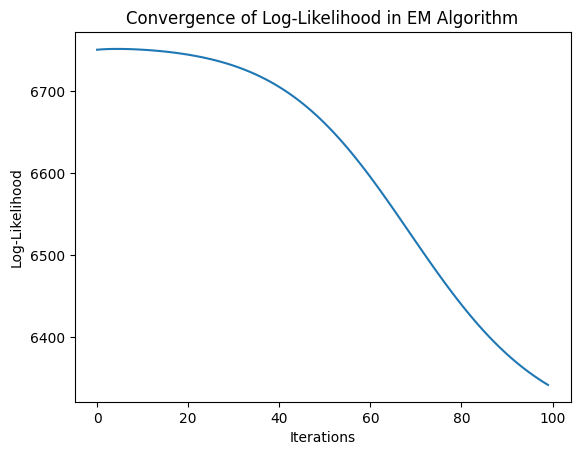

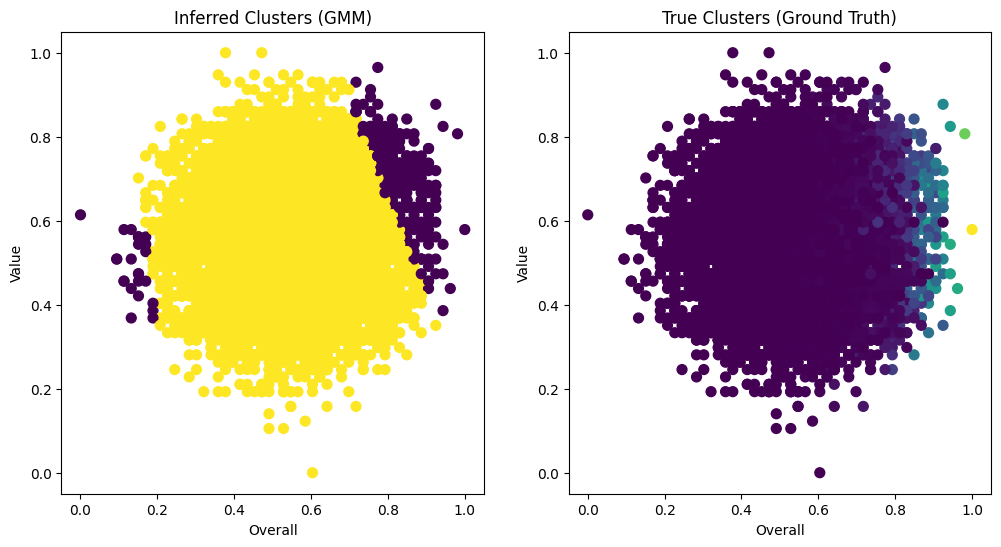

In [34]:
# EM Algorithm for GMM
max_iters = 100  # Maximum iterations
tol = 1e-4  # Convergence threshold
log_likelihoods = []
prev_log_likelihood = -np.inf  # Initialize with a very low value

for i in range(max_iters):
    gamma = expectation_step(X_2d, mu, Sigma, pi)
    pi, mu, Sigma = maximization_step(X_2d, gamma)

    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(X_2d, pi, mu, Sigma)
    log_likelihoods.append(log_likelihood)

    print(f"Iteration {i+1}, Log-Likelihood: {log_likelihood:.4f}")

    # Check for convergence
    if np.abs(log_likelihood - prev_log_likelihood) < tol:
        print(f"Converged at iteration {i+1}.")
        break
    prev_log_likelihood = log_likelihood

# Plot log-likelihood evolution
plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Convergence of Log-Likelihood in EM Algorithm')
plt.show()

# Assign cluster labels based on maximum responsibility
Z = np.argmax(gamma, axis=1)

# Visualization: True vs Predicted Clusters
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

# Plot predicted clusters
ax[0].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=Z, s=50, cmap='viridis')
ax[0].set_xlabel('Overall')
ax[0].set_ylabel('Value')
ax[0].set_title('Inferred Clusters (GMM)')

# Plot ground truth clusters
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=y, s=50, cmap='viridis')
ax[1].set_xlabel('Overall')
ax[1].set_ylabel('Value')
ax[1].set_title('True Clusters (Ground Truth)')

plt.show()

In [35]:
score = rand_score(y, Z)
print(f"Rand Score (Clustering Accuracy): {score:.4f}")

Rand Score (Clustering Accuracy): 0.0481


d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


La  verosimilitud tiene una curva donde comienza alta y va cayendo lo que nos lleva a concluir que el modelo no esta encontrando una estructura optima en los datos. Aunque en las graficas de GMM trata de mostrar dos grupos iniciales,  los datos no se agrupan de forma clara, no representando una figura de cluster definidad.


En conclusion se sugiere que los datos no tienen una estructura de clusters clara, y la segmentación con GMM no es del todo efectiva. Además, la disminución en la verosimilitud indica que el modelo no se está ajustando de manera óptima, lo que podría requerir una reevaluación del enfoque de agrupamiento o buscar otras tecnicas como PCA.

### Parte 2

In [36]:
#Se definio una semilla
SEED = 42
fifa_limpio.head()

Age   Overall  Potential     Value      Wage   Special  \
0  0.307692  0.916667   0.867925  0.477690  0.121053  1.000000   
1  0.307692  0.895833   0.849057  0.412073  0.200000  0.995521   
2  0.384615  0.875000   0.811321  0.244094  0.048421  0.994242   
3  0.410256  1.000000   0.924528  0.564304  0.368421  0.994242   
4  0.256410  0.895833   0.886792  0.469816  0.115789  0.989763   

   Preferred Foot  International Reputation  Weak Foot  Skill Moves    Height  \
0             1.0                      0.75       0.75         0.50  0.701754   
1             1.0                      0.50       0.50         0.75  0.526316   
2             0.0                      0.25       0.50         0.50  0.403509   
3             1.0                      0.75       1.00         0.75  0.561404   
4             1.0                      0.50       0.50         0.50  0.403509   

     Weight  
0  0.548387  
1  0.338710  
2  0.338710  
3  0.354839  
4  0.322581

In [37]:
fifa_limpio.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight'],
      dtype='object')

d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

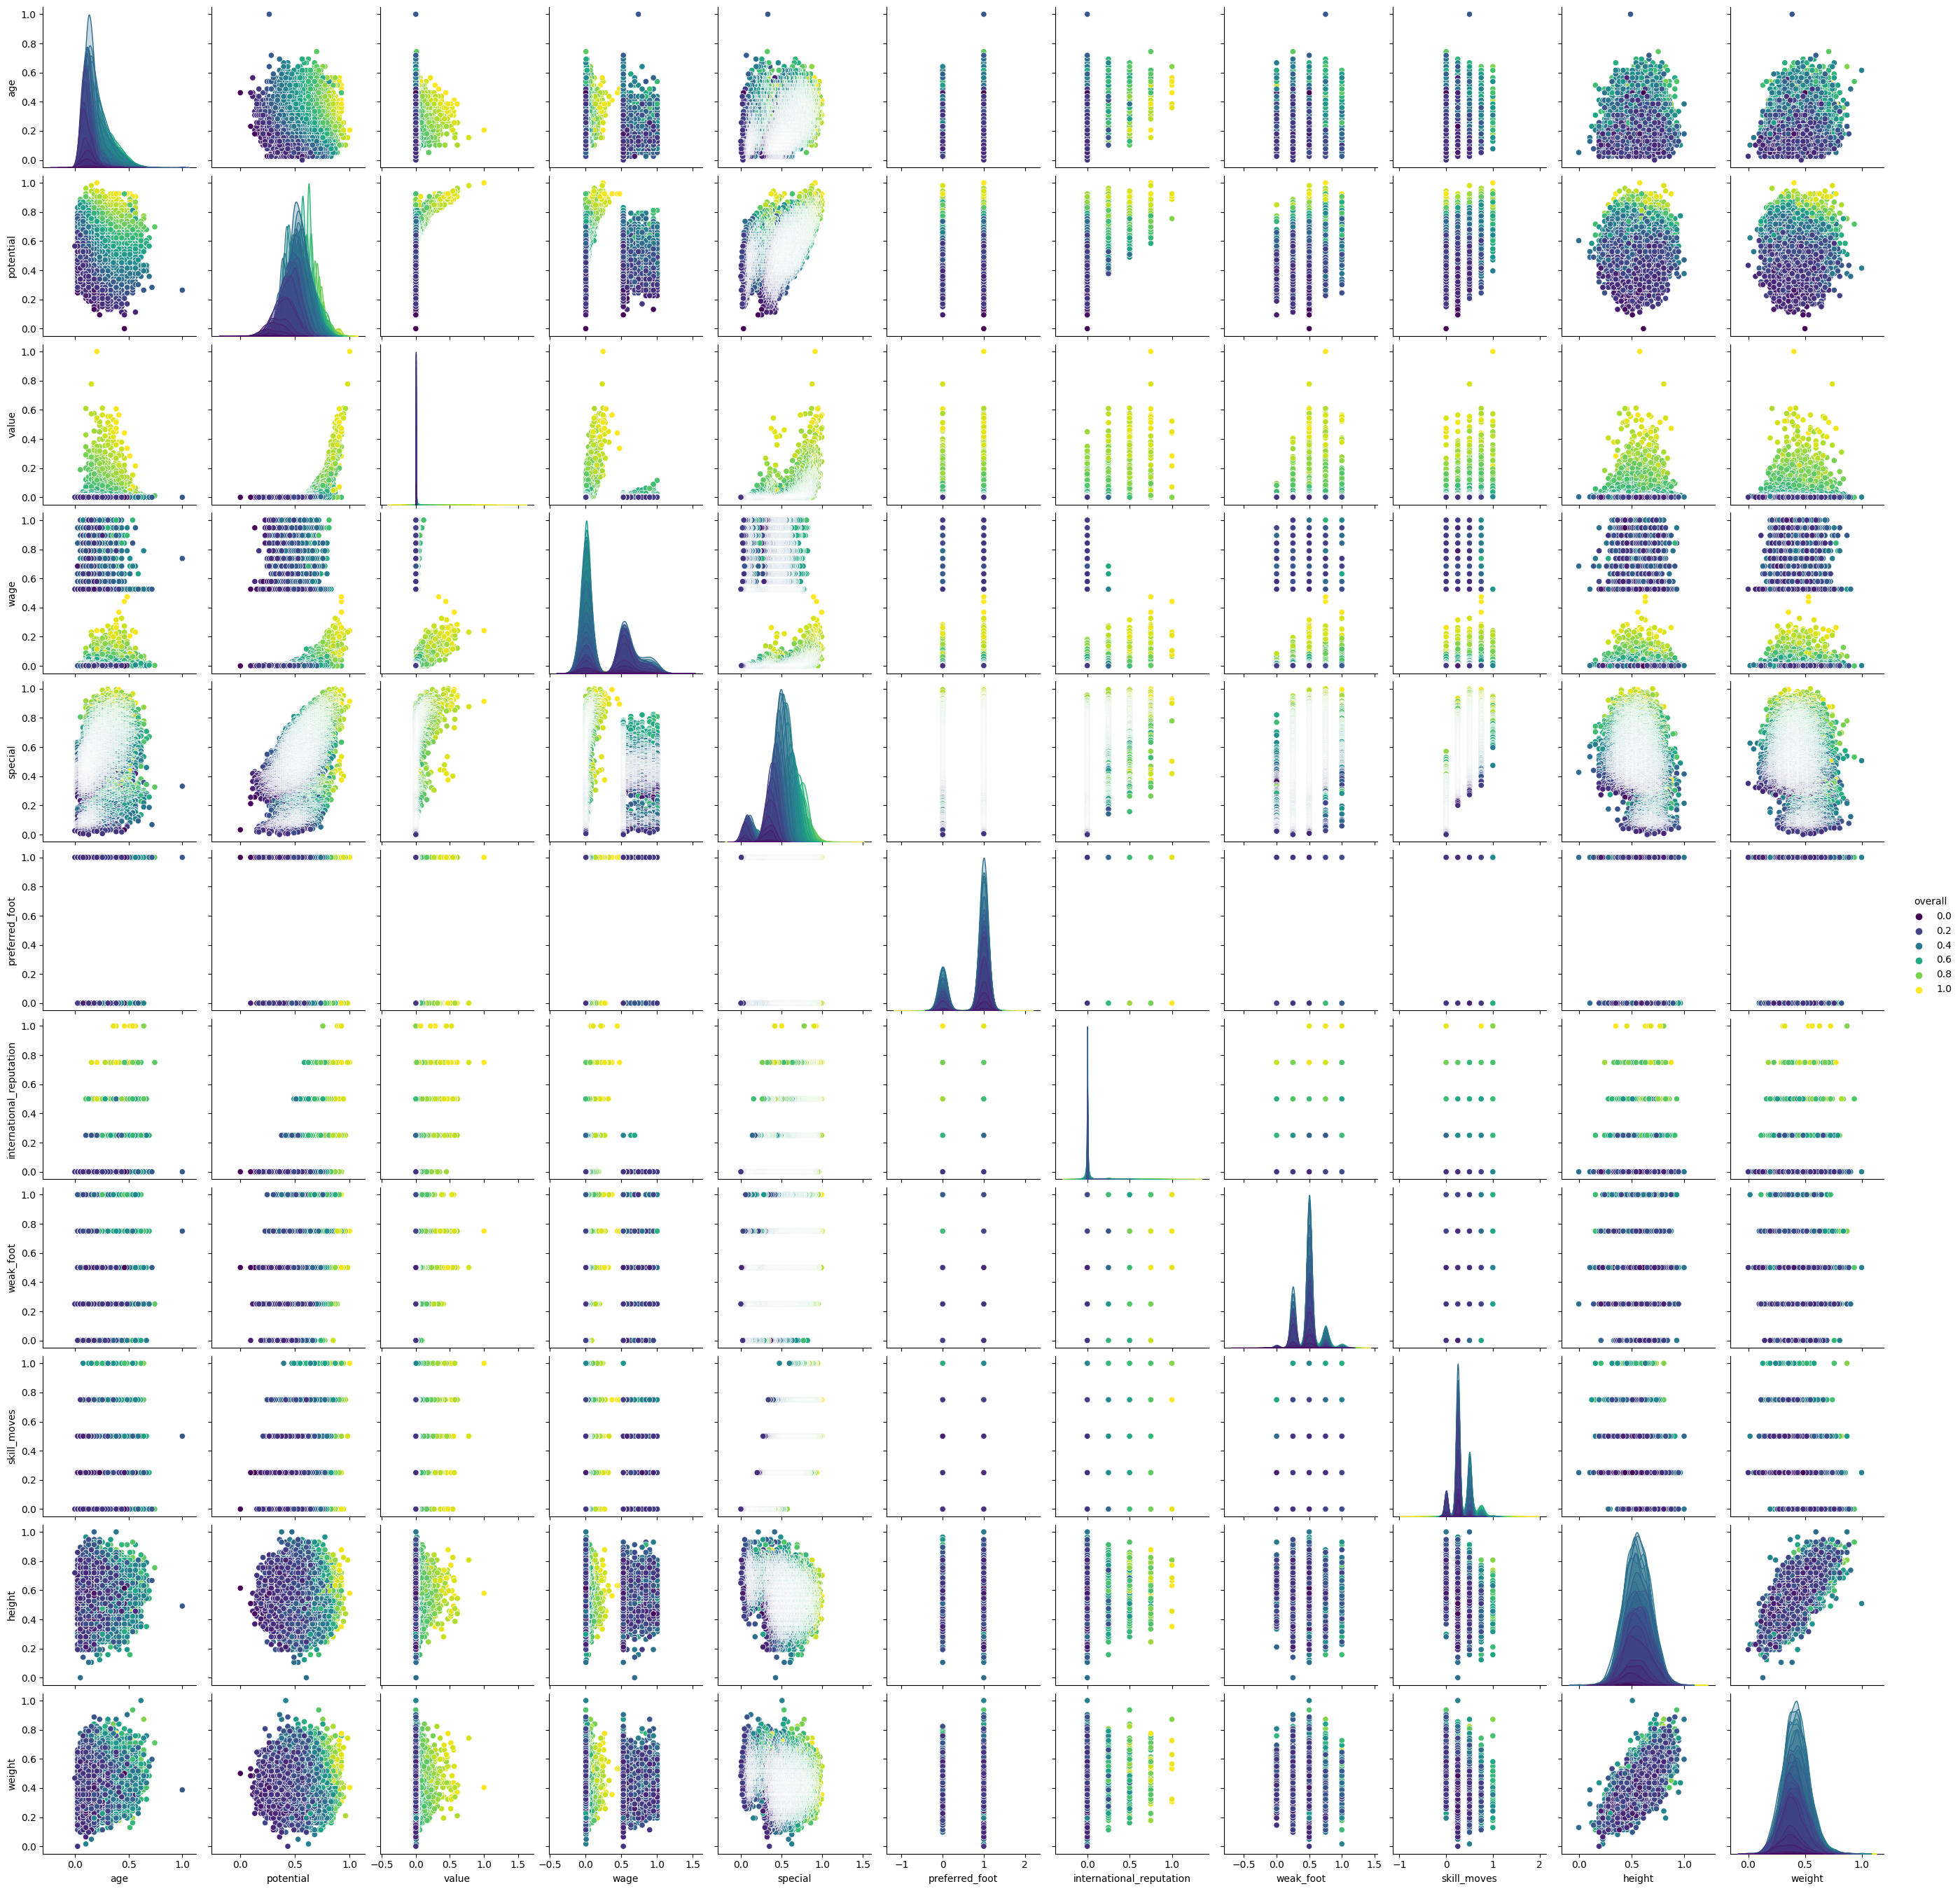

In [38]:
fifa_df = fifa_limpio.copy()
#Pasar minusculas las columnas

fifa_df.columns = fifa_df.columns.str.lower().str.replace(' ', '_')

sns.pairplot(fifa_df, hue="overall", palette='viridis')

# KNN

In [39]:
# Con nuestro dataset establecido y escalado procedemos a implementar el metodo del codo y
# la silueta para determinar el numero optimo de clusters

def scatter_plot(X, y=None):
  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(figsize=(7, 4))

  if y is None:
    ax.scatter(X[:, 2], X[:, 3], marker=".", s=10)
  else:
    ax.scatter(X[:, 2], X[:, 3], marker=".", s=10, c=y)

  ax.set_xlabel("$x_1$", fontsize=14)
  ax.set_ylabel("$x_2$", fontsize=14)
  ax.tick_params(axis='both', labelsize=8)

  ax.grid(False)
  plt.tight_layout()

  plt.savefig("scatter_fifa.png", dpi=600, transparent=True)

  plt.show()

In [40]:
def train_kmeans(X):
    ks = np.linspace(2, 8, 7, dtype=np.int64)  # Generaremos 7 clusters de 2 a 8
    inertias = []
    silhouettes = []
    davies_bouldin = []
    kmeans_k = []

    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=SEED)
        kmeans.fit(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, kmeans.labels_))
        davies_bouldin.append(davies_bouldin_score(X, kmeans.labels_))
        kmeans_k.append(kmeans)

    return kmeans_k, inertias, silhouettes, davies_bouldin, ks


In [41]:
kmeans_k, inertias, silhouettes, davies_bouldin_knn, ks = train_kmeans(fifa_df)

In [42]:
def print_kmeans_results(kmeans_k, inertias, silhouettes, davies_bouldin, ks):
    print("\nResultados de KMeans:")
    print("{:^10} {:^15} {:^15} {:^20}".format("Clusters", "Inertia", "Silhouette", "Davies-Bouldin Index"))
    print("-" * 60)
    for i in range(len(ks)):
        print("{:^10} {:^15.2f} {:^15.4f} {:^20.4f}".format(ks[i], inertias[i], silhouettes[i], davies_bouldin[i]))

print_kmeans_results(kmeans_k, inertias, silhouettes, davies_bouldin_knn, ks)


Resultados de KMeans:
 Clusters      Inertia       Silhouette    Davies-Bouldin Index
------------------------------------------------------------
    2          4983.12         0.4345             0.9901       
    3          3587.95         0.3645             1.0864       
    4          3076.01         0.3070             1.2133       
    5          2873.74         0.2879             1.2869       
    6          2711.93         0.2688             1.3659       
    7          2625.90         0.2492             1.5508       
    8          2222.11         0.2602             1.3969       


## Método del codo

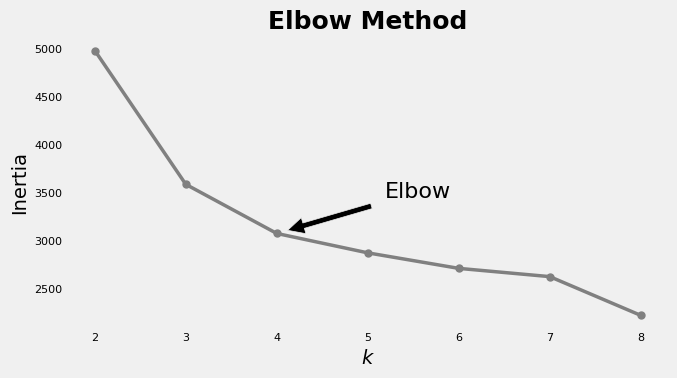

In [43]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, inertias, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Inertia", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Elbow Method", fontsize=18, fontweight="bold")
ax.grid(False)

ax.annotate("Elbow",
            xy=(4, inertias[2]),
            xytext=(0.55, 0.45),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor="black", shrink=0.1)
            )

plt.tight_layout()
plt.savefig("elbowFifa.png", dpi=600, transparent=True)
plt.show()

#### Método de la silueta

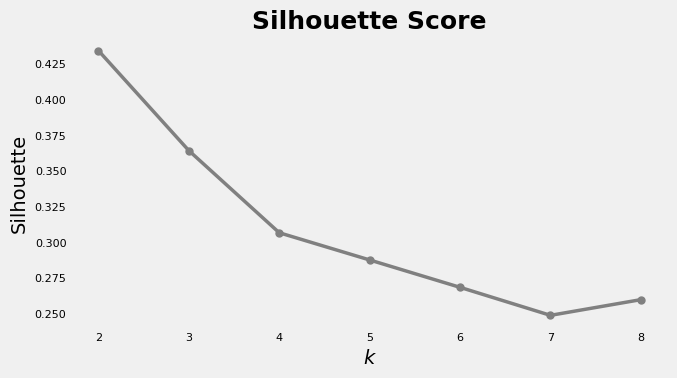

In [44]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, silhouettes, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Silhouette Score", fontsize=18, fontweight="bold")
ax.grid(False)

# ax.annotate("silhouette score = {:.2f}".format(silhouettes[3]),
#             xy=(5, silhouettes[3]),
#             xytext=(0.65, 0.8),
#             textcoords="figure fraction",
#             fontsize=12,
#             arrowprops=dict(facecolor="black", shrink=0.1)
#             )

plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=600, transparent=True)
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.3644909342461811
For n_clusters = 4 The average silhouette_score is : 0.3069909952263821
For n_clusters = 5 The average silhouette_score is : 0.2879446064848453
For n_clusters = 6 The average silhouette_score is : 0.26877928408401336


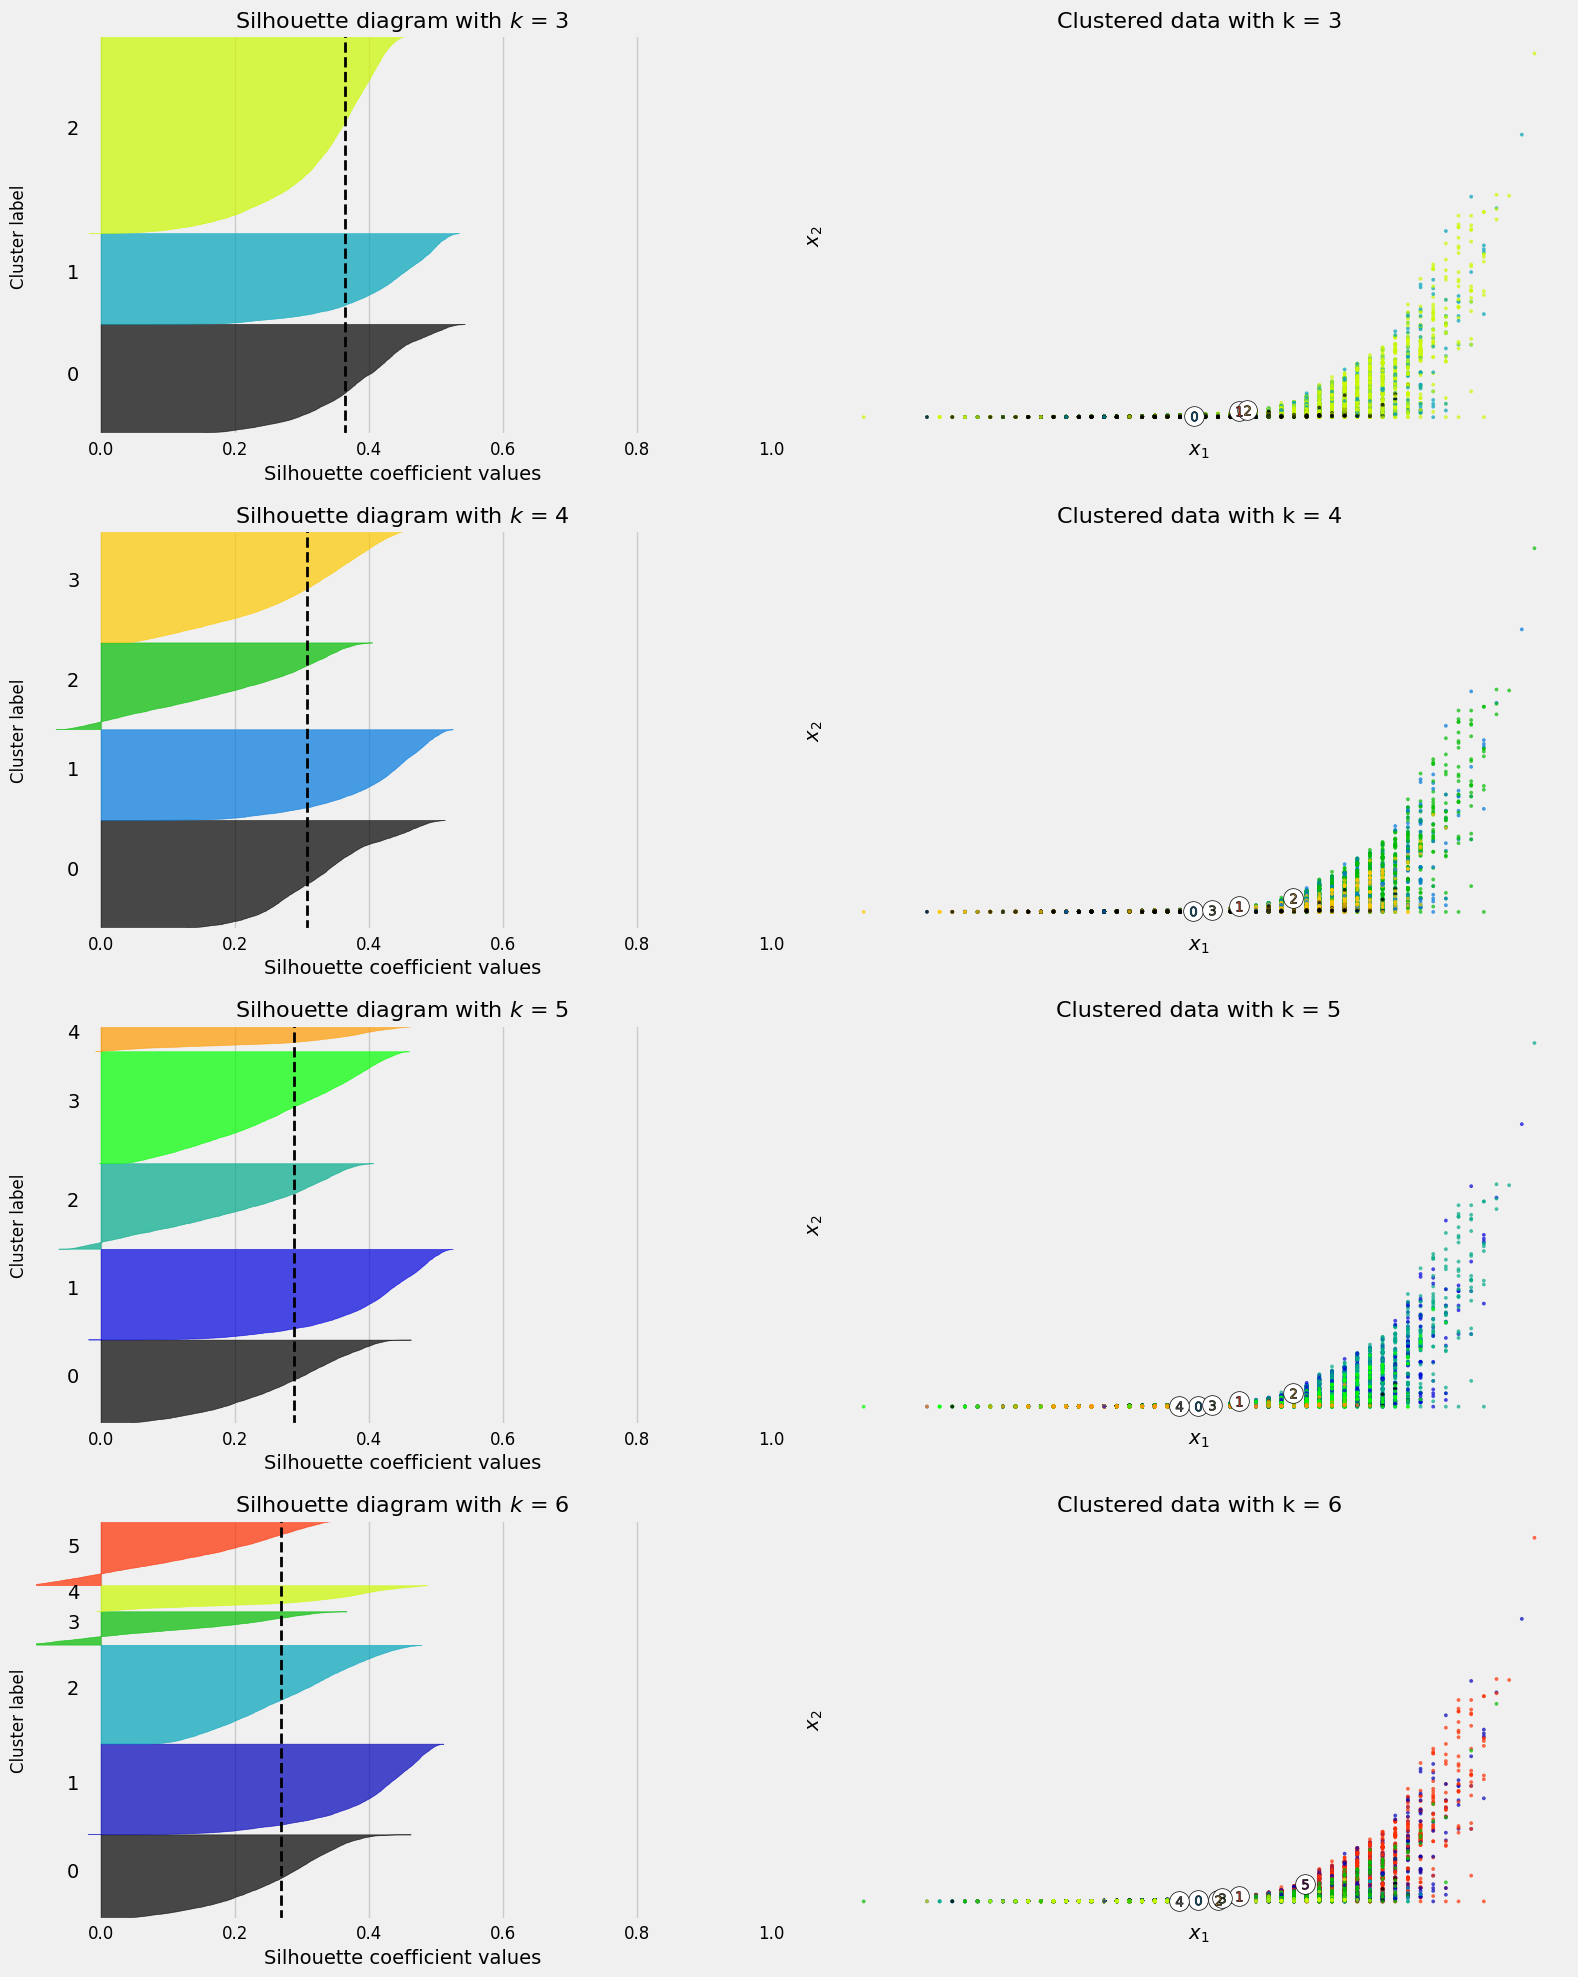

In [45]:
range_n_clusters = [3, 4, 5, 6]

fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# [0, 0] [0, 1]
# [1, 0] [1, 1]
# [2, 0] [2, 1]
# [3, 0] [3, 1]

for row, n_clusters in enumerate(range_n_clusters):

  # Create a subplot with 1 row and 2 columns
  # fig, (ax1, ax2) = plt.subplots(1, 2)

  # fig.set_size_inches(12, 6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax[row, 0].set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax[row, 0].set_ylim([0, len(fifa_df) + (n_clusters + 1) * 10])

  # get predictions for each label
  cluster_labels = kmeans_k[n_clusters-2].predict(fifa_df)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(fifa_df, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(fifa_df, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[row, 0].fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[row, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax[row, 0].set_title("Silhouette diagram with $k$ = {}".format(n_clusters), fontsize=16)
  ax[row, 0].set_xlabel("Silhouette coefficient values", fontsize=14)
  ax[row, 0].set_ylabel("Cluster label", fontsize=12)

  ax[row, 0].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  ax[row, 0].tick_params(axis='both', which='major', labelsize=12)

  # The vertical line for average silhouette score of all the values
  ax[row, 0].axvline(x=silhouette_avg, color="black", linestyle="--", linewidth=2)

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax[row, 1].scatter(fifa_df.iloc[:, 2], fifa_df.iloc[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')

  # Labeling the clusters
  centers = kmeans_k[n_clusters-2].cluster_centers_
  # Draw white circles at cluster centers
  ax[row, 1].scatter(centers[:, 2], centers[:, 3], marker='o',
                     c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax[row, 1].scatter(c[2], c[3], marker='$%d$' % i, alpha=1,
                       s=50, edgecolor='k')

  ax[row, 1].set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
  ax[row, 1].set_xlabel("$x_1$", fontsize=14)
  ax[row, 1].set_ylabel("$x_2$", fontsize=14)
  ax[row, 1].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 1].set_xticks([])

  ax[row, 1].grid(False)

  # fig.suptitle(("Silhouette analysis for KMeans clustering "
  # "with $k$ = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()

### Resumen silueta

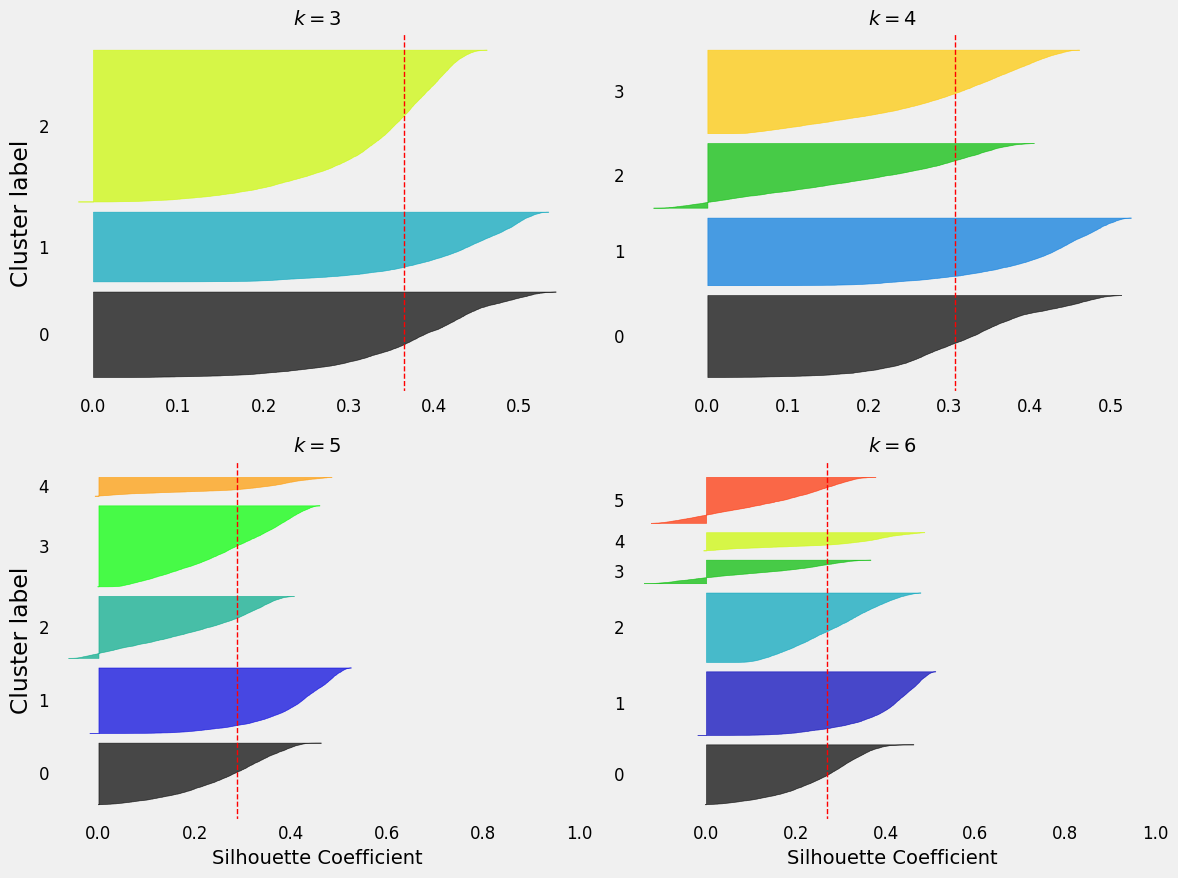

In [46]:
plt.figure(figsize=(12, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(fifa_df, y_pred)

    padding = len(fifa_df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.nipy_spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster label")

    if k in (5, 6):
      plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=14)
    # else:
    #     plt.tick_params(labelbottom=False)
    plt.tick_params(labelsize=12)
    plt.axvline(x=silhouettes[k - 2], color="red", linestyle="--", linewidth=1)
    plt.title("$k={}$".format(k), fontsize=14, fontweight="bold")

    plt.grid(False)

plt.tight_layout()
plt.show()

### Regiones de decision

d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


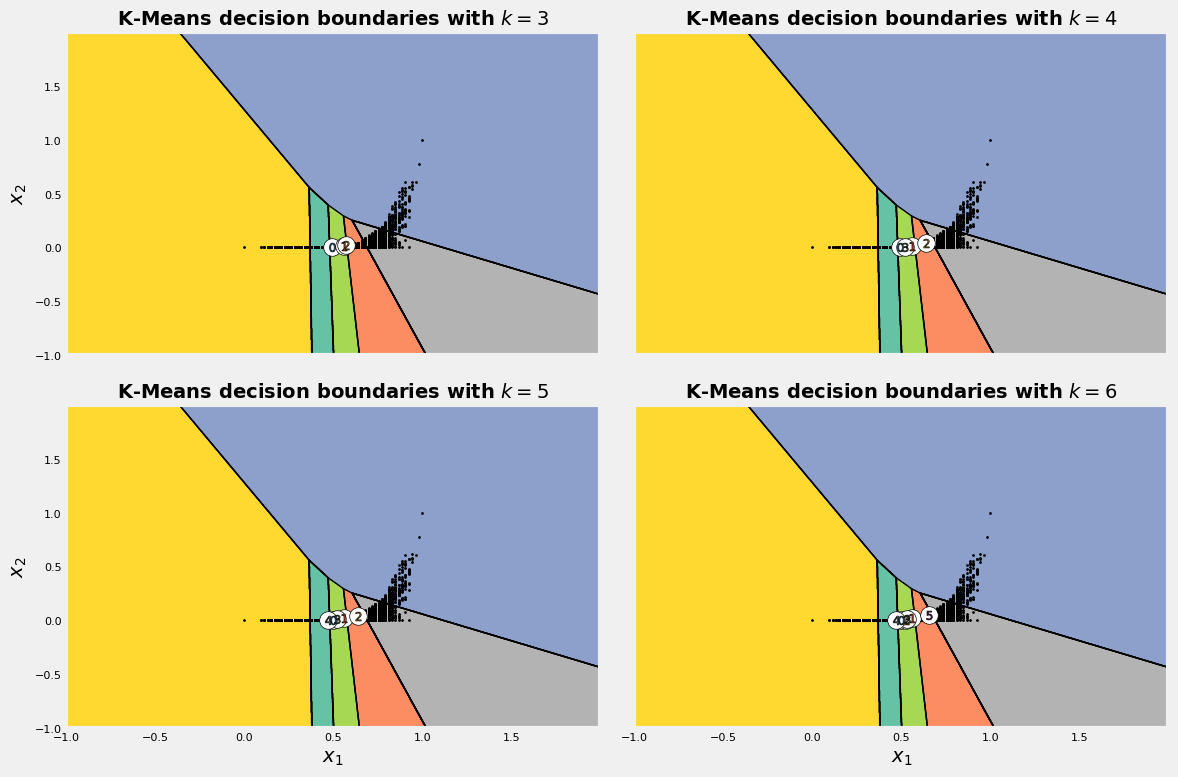

In [47]:
# Seleccionamos dos features relevantes
X_2d = fifa_df[['potential', 'value']]
# Entrenar KMeans en este subconjunto
kmeans_2d = KMeans(n_clusters=k, random_state=SEED)
kmeans_2d.fit(X_2d)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = fifa_df.iloc[:, 2].min() - 1, fifa_df.iloc[:, 3].max() + 1
y_min, y_max = fifa_df.iloc[:, 2].min() - 1, fifa_df.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# [0, 0] [0, 1]
# [1, 0] [1, 1]

for i, j, k in zip([0, 0, 1, 1], [0, 1, 0, 1], [3, 4, 5, 6]):

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  ax[i, j].contourf(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap="Set2")
  ax[i, j].contour(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              linewidths=1, colors='k')

  ax[i, j].plot(fifa_df.iloc[:, 2], fifa_df.iloc[:, 3], 'k.', markersize=2)

  centers = kmeans_k[k-2].cluster_centers_
  ax[i, j].scatter(centers[:, 2], centers[:, 3], marker='o',
                  c="white", alpha=1, s=160, edgecolor='k', zorder=5)
  for cluster_idx, c in enumerate(centers):
    ax[i, j].scatter(c[2], c[3], marker='$%d$' % cluster_idx, alpha=1,
                    s=40, edgecolor='k', zorder=10)

  ax[i, j].set_title("K-Means decision boundaries with $k = {}$".format(k),
                    fontsize=14, fontweight="bold")

  if k % 2 == 1:
    ax[i, j].set_ylabel("$x_2$", fontsize=14)

  if k >= 5:
    ax[i, j].set_xlabel("$x_1$", fontsize=14)

  ax[i, j].tick_params(axis='both', labelsize=8)

  ax[i, j].grid(False)

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=800, transparent=True)
plt.show()

# GMM

In [48]:
def train_gmm(X):
    ks_gmm = np.linspace(2, 8, 7, dtype=np.int64)  # Generamos 7 clusters GMM con k de 2 a 8
    bics = []
    silhouettes = []
    davies_bouldin = []
    gmm_models = []

    for k in ks_gmm:
        gmm = GaussianMixture(n_components=k, random_state=SEED)
        gmm.fit(X)

        # En GMM se calcula el BIC, mientras menor sea, mejor se ajusta el modelo
        bic_val = gmm.bic(X)
        bics.append(bic_val)

        labels = gmm.predict(X)
        silhouette_val = silhouette_score(X, labels)
        silhouettes.append(silhouette_val)

        dbi_val = davies_bouldin_score(X, labels)
        davies_bouldin.append(dbi_val)

        gmm_models.append(gmm)

    return gmm_models, bics, silhouettes, davies_bouldin, ks_gmm


In [49]:
gmm_models, bics, silhouettes, davies_bouldin_gmm, ks_gmm = train_gmm(fifa_df)

In [50]:
def print_gmm_results(gmm_models, bics, silhouettes, davies_bouldin, ks_gmm):
    print("\nResultados de GMM:")
    print("{:^10} {:^15} {:^15} {:^20}".format("Clusters", "BIC", "Silhouette", "Davies-Bouldin Index"))
    print("-" * 60)
    for i in range(len(ks_gmm)):
        print("{:^10} {:^15.2f} {:^15.4f} {:^20.4f}".format(ks_gmm[i], bics[i], silhouettes[i], davies_bouldin[i]))

print_gmm_results(gmm_models, bics, silhouettes, davies_bouldin_gmm, ks_gmm)


Resultados de GMM:
 Clusters        BIC         Silhouette    Davies-Bouldin Index
------------------------------------------------------------
    2        -534115.18        0.4345             0.9901       
    3        -707993.93        0.2630             1.3652       
    4        -761866.00        0.3103             1.3385       
    5        -781082.61        0.3020             1.3776       
    6        -788303.66        0.2757             1.9267       
    7        -821874.75        0.2559             1.8737       
    8        -848936.50        0.2094             1.6276       


### Método del codo

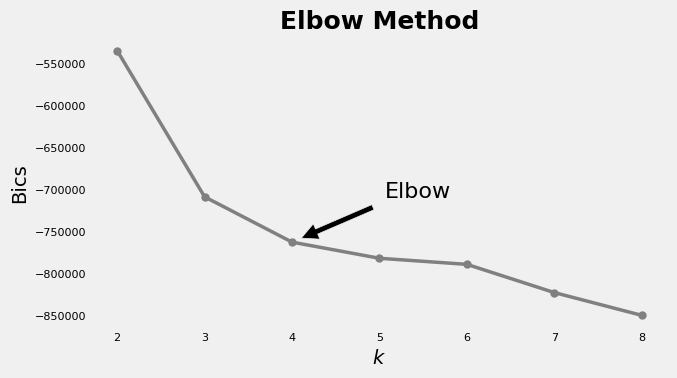

In [51]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks_gmm, bics, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Bics", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Elbow Method", fontsize=18, fontweight="bold")
ax.grid(False)

ax.annotate("Elbow",
            xy=(4, bics[2]),
            xytext=(0.55, 0.45),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor="black", shrink=0.1)
            )

plt.tight_layout()
plt.savefig("elbow.png", dpi=600, transparent=True)
plt.show()

### Método de la silueta

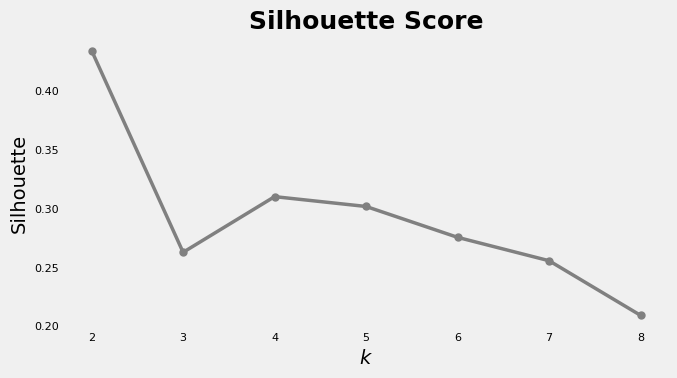

In [52]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks_gmm, silhouettes, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Silhouette Score", fontsize=18, fontweight="bold")
ax.grid(False)

# ax.annotate("silhouette score = {:.2f}".format(silhouettes[3]),
#             xy=(5, silhouettes[3]),
#             xytext=(0.65, 0.8),
#             textcoords="figure fraction",
#             fontsize=12,
#             arrowprops=dict(facecolor="black", shrink=0.1)
#             )

plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=600, transparent=True)
plt.show()

### Diagrama de silueta por clusters

For n_clusters = 3 The average silhouette_score is : 0.26300181023793795
For n_clusters = 4 The average silhouette_score is : 0.3103275843498474
For n_clusters = 5 The average silhouette_score is : 0.3019692539375156
For n_clusters = 6 The average silhouette_score is : 0.27573206817887985


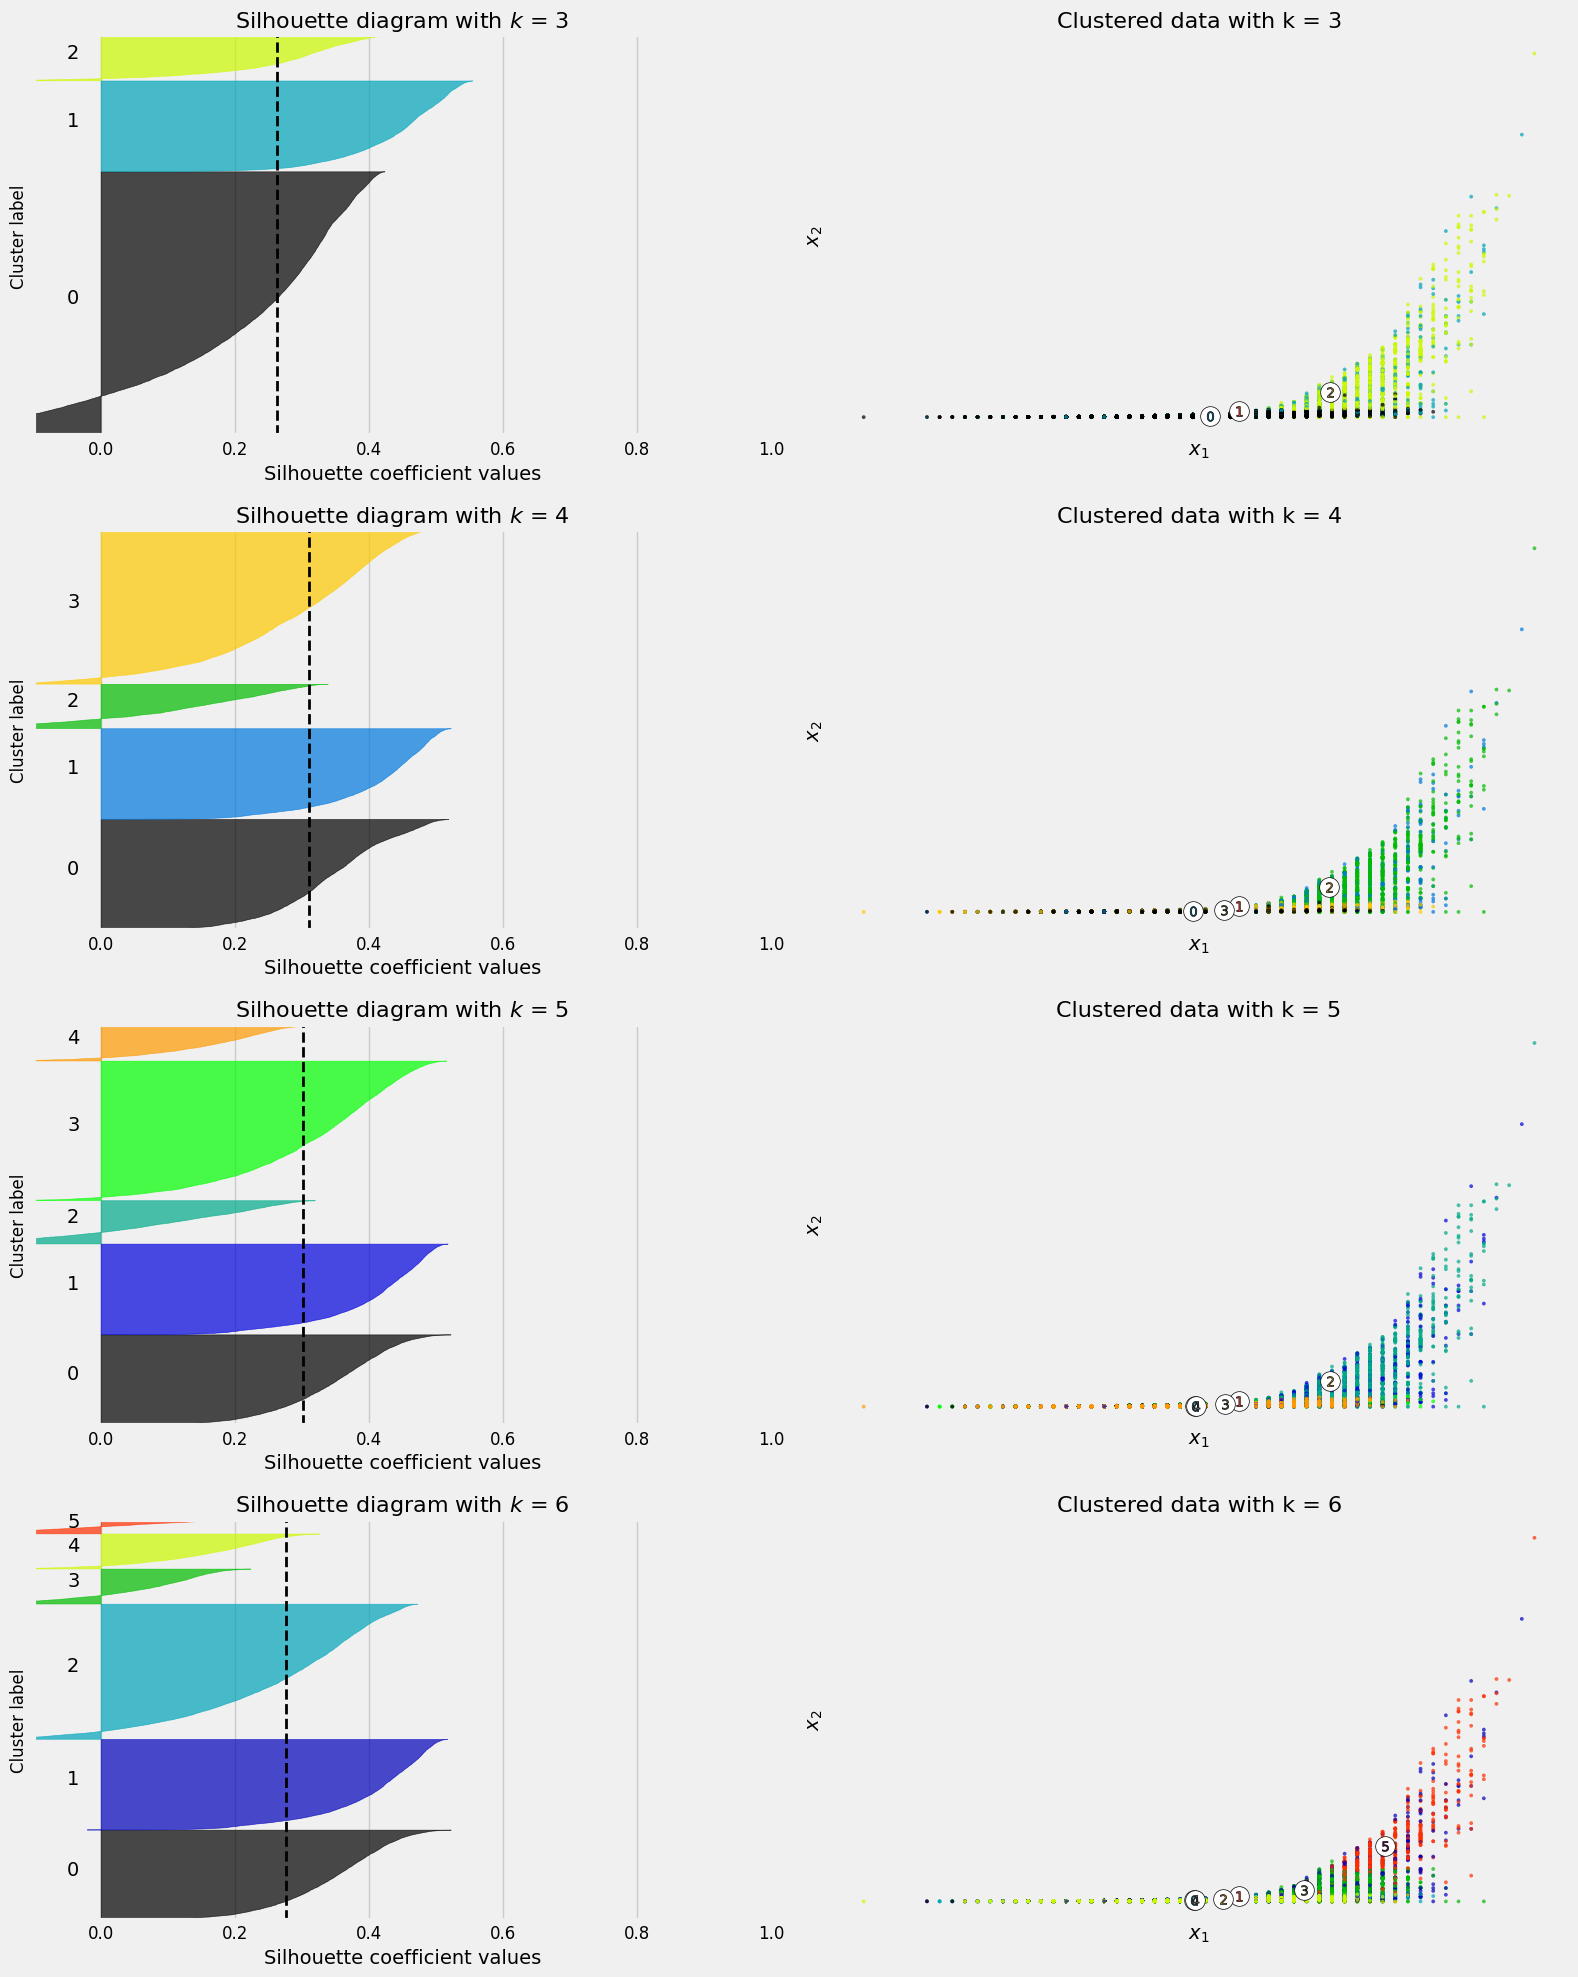

In [53]:
range_n_clusters = [3, 4, 5, 6]

fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# [0, 0] [0, 1]
# [1, 0] [1, 1]
# [2, 0] [2, 1]
# [3, 0] [3, 1]

for row, n_clusters in enumerate(range_n_clusters):

  # Create a subplot with 1 row and 2 columns
  # fig, (ax1, ax2) = plt.subplots(1, 2)

  # fig.set_size_inches(12, 6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax[row, 0].set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax[row, 0].set_ylim([0, len(fifa_df) + (n_clusters + 1) * 10])

  # get predictions for each label
  cluster_labels = gmm_models[n_clusters-2].predict(fifa_df)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(fifa_df, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(fifa_df, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[row, 0].fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[row, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax[row, 0].set_title("Silhouette diagram with $k$ = {}".format(n_clusters), fontsize=16)
  ax[row, 0].set_xlabel("Silhouette coefficient values", fontsize=14)
  ax[row, 0].set_ylabel("Cluster label", fontsize=12)

  ax[row, 0].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  ax[row, 0].tick_params(axis='both', which='major', labelsize=12)

  # The vertical line for average silhouette score of all the values
  ax[row, 0].axvline(x=silhouette_avg, color="black", linestyle="--", linewidth=2)

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax[row, 1].scatter(fifa_df.iloc[:, 2], fifa_df.iloc[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')

  # Labeling the clusters
  centers = gmm_models[n_clusters-2].means_
  # Draw white circles at cluster centers
  ax[row, 1].scatter(centers[:, 2], centers[:, 3], marker='o',
                     c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax[row, 1].scatter(c[2], c[3], marker='$%d$' % i, alpha=1,
                       s=50, edgecolor='k')

  ax[row, 1].set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
  ax[row, 1].set_xlabel("$x_1$", fontsize=14)
  ax[row, 1].set_ylabel("$x_2$", fontsize=14)
  ax[row, 1].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 1].set_xticks([])

  ax[row, 1].grid(False)

  # fig.suptitle(("Silhouette analysis for KMeans clustering "
  # "with $k$ = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()

### Resumen silueta

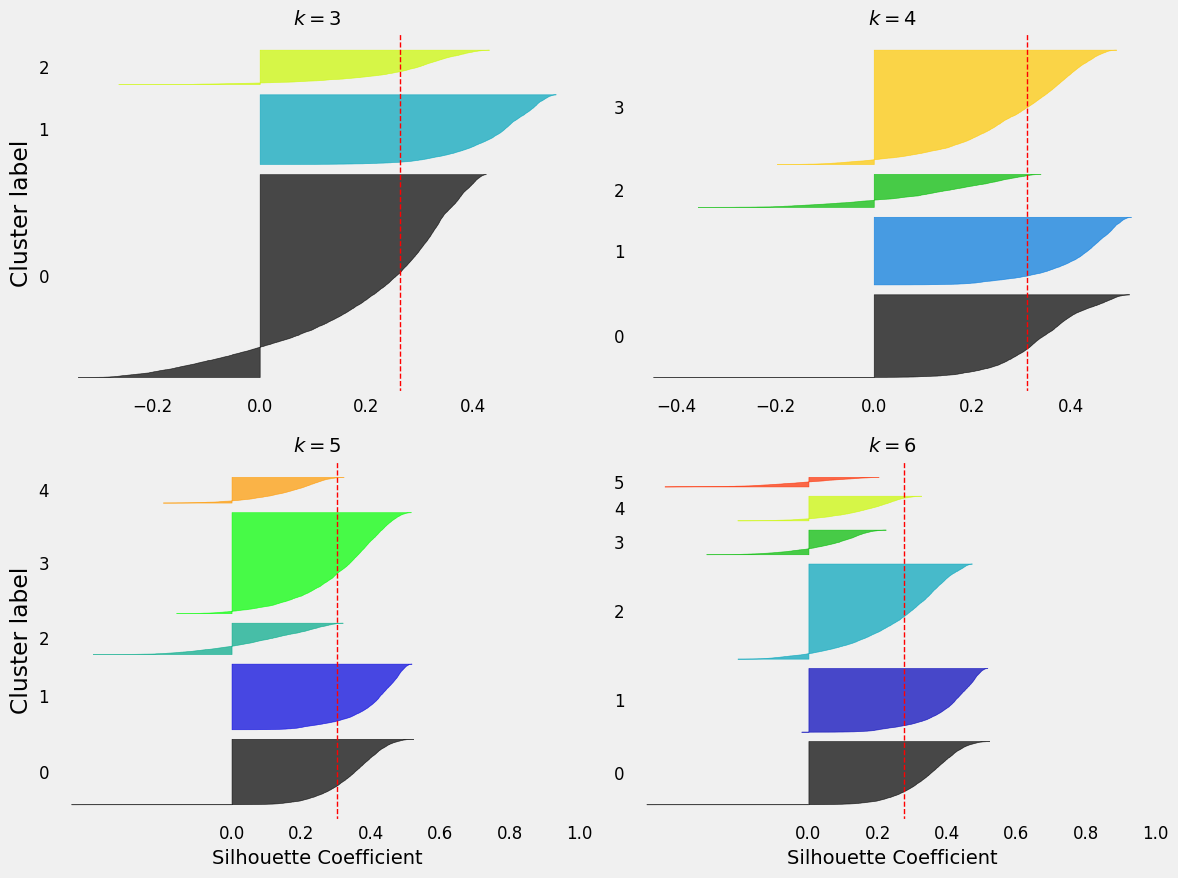

In [54]:
plt.figure(figsize=(12, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = gmm_models[k - 2].predict(fifa_df)
    silhouette_coefficients = silhouette_samples(fifa_df, y_pred)

    padding = len(fifa_df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.nipy_spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster label")

    if k in (5, 6):
      plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=14)
    # else:
    #     plt.tick_params(labelbottom=False)
    plt.tick_params(labelsize=12)
    plt.axvline(x=silhouettes[k - 2], color="red", linestyle="--", linewidth=1)
    plt.title("$k={}$".format(k), fontsize=14, fontweight="bold")

    plt.grid(False)

plt.tight_layout()
plt.show()

### Regiones de decision

d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\programasProgramacion\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


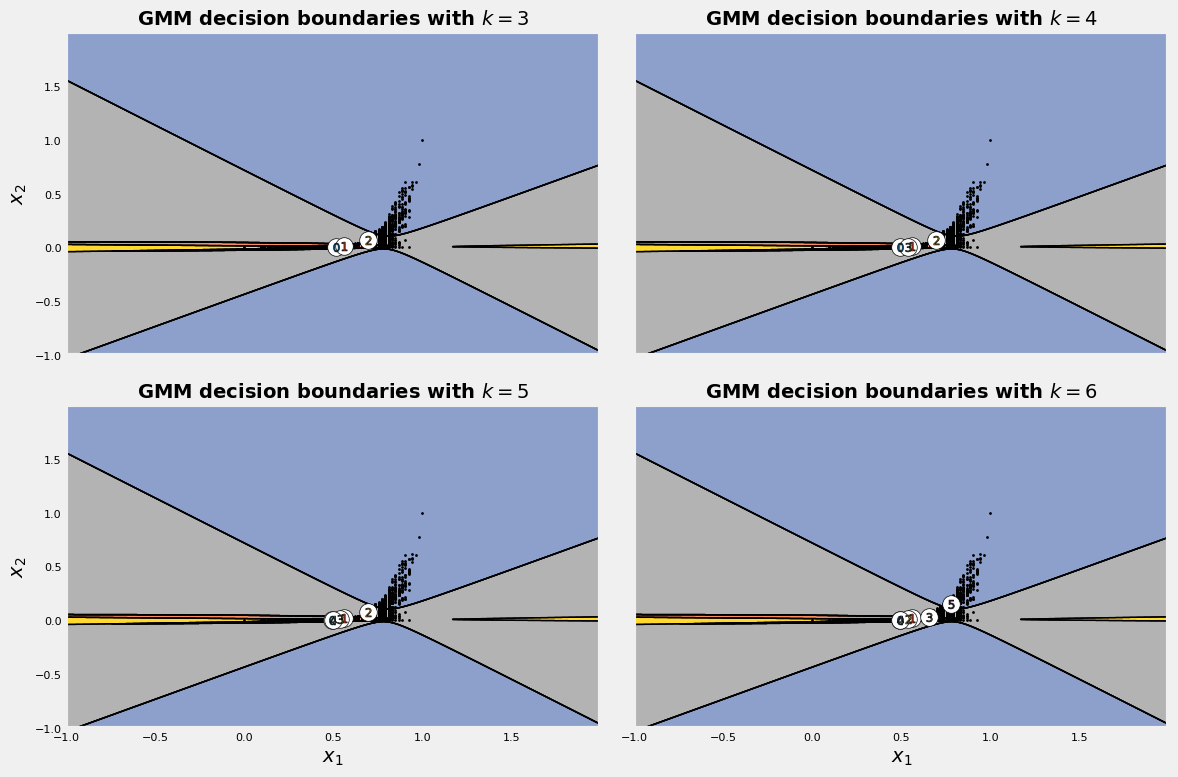

In [55]:
# Seleccionamos dos features relevantes
X_2d = fifa_df[['potential', 'value']]
# Entrenar GMM en este subconjunto

gmm_2d = GaussianMixture(n_components=k, random_state=SEED)
gmm_2d.fit(X_2d)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = fifa_df.iloc[:, 2].min() - 1, fifa_df.iloc[:, 3].max() + 1
y_min, y_max = fifa_df.iloc[:, 2].min() - 1, fifa_df.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# [0, 0] [0, 1]
# [1, 0] [1, 1]

for i, j, k in zip([0, 0, 1, 1], [0, 1, 0, 1], [3, 4, 5, 6]):

  # Obtain labels for each point in mesh. Use last trained model.
  Z = gmm_2d.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  ax[i, j].contourf(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap="Set2")
  ax[i, j].contour(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              linewidths=1, colors='k')

  ax[i, j].plot(fifa_df.iloc[:, 2], fifa_df.iloc[:, 3], 'k.', markersize=2)

  centers = gmm_models[k-2].means_
  ax[i, j].scatter(centers[:, 2], centers[:, 3], marker='o',
                  c="white", alpha=1, s=160, edgecolor='k', zorder=5)
  for cluster_idx, c in enumerate(centers):
    ax[i, j].scatter(c[2], c[3], marker='$%d$' % cluster_idx, alpha=1,
                    s=40, edgecolor='k', zorder=10)

  ax[i, j].set_title("GMM decision boundaries with $k = {}$".format(k),
                    fontsize=14, fontweight="bold")

  if k % 2 == 1:
    ax[i, j].set_ylabel("$x_2$", fontsize=14)

  if k >= 5:
    ax[i, j].set_xlabel("$x_1$", fontsize=14)

  ax[i, j].tick_params(axis='both', labelsize=8)

  ax[i, j].grid(False)

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=800, transparent=True)
plt.show()

Para dataset de fifa 2023:

Para el análisis de este dataset seleccionamos variables asociadas a las caracteristicas fisicas de los jugadores y el precio del mercado. Como limpieza
de datos modificamos los caracteres de moneda y potenciales para dejar una base
en mismas unidades, además dejamos los campos de forma numerica transformando
a binaria la caracteristica categorica "pie de preferencia". Se realiza un escalado de los datos a partir de MinMaxScaler para el ingreso a los modelos.

KNN:

Para el dataset limpio y bajo la iteración con rango de clusters de 2 a 8, se observa que para 2 clusters se tiene una inercia de 3432.85, un índice de silueta de 0.5116 y un indice de Davies-Bouldin de 0.7943, generando el mejor escenario bajo estas métricas, esto da evidencia del nivel de aproximación entre los puntos dando indicio de que no existen grupos dentro de esta combinación de variables. De allí se observa que a medida que aumentan los clusters se disminuye el indice de silueta y la inercia (lo que indica que los puntos están más cerca de sus centroides, pero con alto solapamiento), mientras que el indice de Davies-Bouldin aumenta indicando que los clusters son menos definidos y de menor calidad. No obstante, cuando nos dirigimos al método del codo y del diagrama de silueta, nos muestra que podemos clusterizar el conjunto de variables en 3 grupos, esto dado que el método del codo muestra que el mejor escenario es con 4 grupos, pero silueta con 3, ya que están cercas seleccionamos los grupos propuestos desde el score de silueta.

Ahora bien, utilizando el escenario de variables "potential" y "value", queremos observar como se comportan los jugadores en términos del valor del mercado y sus máximas habilidades proyectadas, realizando el diagrama de silueta y el plano 2D de estas variables vemos que existe una tendencia exponencial de los grupos, es decir, que a medida que aumentan las habilidades aumenta el valor del jugador. A pesar que la gráfica muestra el sentido de su combinación, no genera una división apreciable de los grupos, por lo que el diagrama de silueta muestra que los clusters alcanzan en muy poca proporción sobrepasar la media del coeficiente de silueta, y en algunos casos coeficientes de silueta negativos, agrupando erroneamente.

GMM:

Al igual que en el escenario por KNN, se observa que el mejor escenario según las métricas se establece para 2 clusters, con tiene un BIC de -619229.76, un índice de silueta de 0.5116 y un indice de Davies-Bouldin de 0.7943, de nuevo confirmando el nivel de cercania de los grupos. De allí se observa que a medida que aumentan los clusters se disminuye el indice de silueta y el BIC (lo que indica que se mejora el equilibrio entre ajuste y complejidad, pero con alto solapamiento), mientras que el indice de Davies-Bouldin aumenta indicando que los clusters son menos definidos y de menor calidad. Al igual que en KNN, cuando nos dirigimos al método del codo y del diagrama de silueta, nos muestra que podemos clusterizar el conjunto de variables en 3 grupos por su cercania de grupos propuestos.

Ahora bien, siguiendo el escenario de variables "potential" y "value", bajo el método de GMM no se genera una división apreciable de los grupos, por lo que el diagrama de silueta muestra que los clusters alcanzan en muy poca proporción sobrepasar la media del coeficiente de silueta. Una diferencia marcada se nota en los coeficientes de silueta negativos a comparación con KNN, por ende, existe un error de agrupación mayor desde GMM que en KNN.
